<a href="https://colab.research.google.com/github/cod3astro/kaggle_ML_competition/blob/main/loan_payback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col='id')
target = train_df['loan_paid_back']
train_df.drop(columns=['loan_paid_back'], inplace=True)
train_df['is_train'] = 1 # Mark training data

test_df = pd.read_csv('test.csv', index_col='id')
test_df['is_train'] = 0 # Mark test data

df = pd.concat([train_df, test_df])
df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,is_train
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,1
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1


In [3]:
df.shape

(848563, 12)

In [4]:
df.isnull().any().any()

np.False_

In [5]:
df.describe(include='all')

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,is_train
count,848563.000000,848563.000000,848563.000000,848563.000000,848563.000000,848563,848563,848563,848563,848563,848563,848563.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,437655,412529,399530,643852,463658,84105,NaN
mean,48218.466144,0.120662,680.952514,15019.234385,12.355139,NaN,NaN,NaN,NaN,NaN,NaN,0.700000
std,26714.243232,0.068576,55.484775,6925.217352,2.011555,NaN,NaN,NaN,NaN,NaN,NaN,0.458258
min,6002.430000,0.011000,395.000000,500.050000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,27939.785000,0.072000,646.000000,10275.010000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,46552.600000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,61003.900000,0.156000,719.000000,18851.520000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
skewness = df[numerical_cols].skew().sort_values(ascending=False)

print("Skewness of numerical features:\n")
print(skewness)

Skewness of numerical features:

annual_income           1.719969
debt_to_income_ratio    1.410672
loan_amount             0.206873
interest_rate           0.047951
credit_score           -0.168397
is_train               -0.872872
dtype: float64


Let's visualize the distribution of the top 5 most skewed numerical features to better understand their skewness.

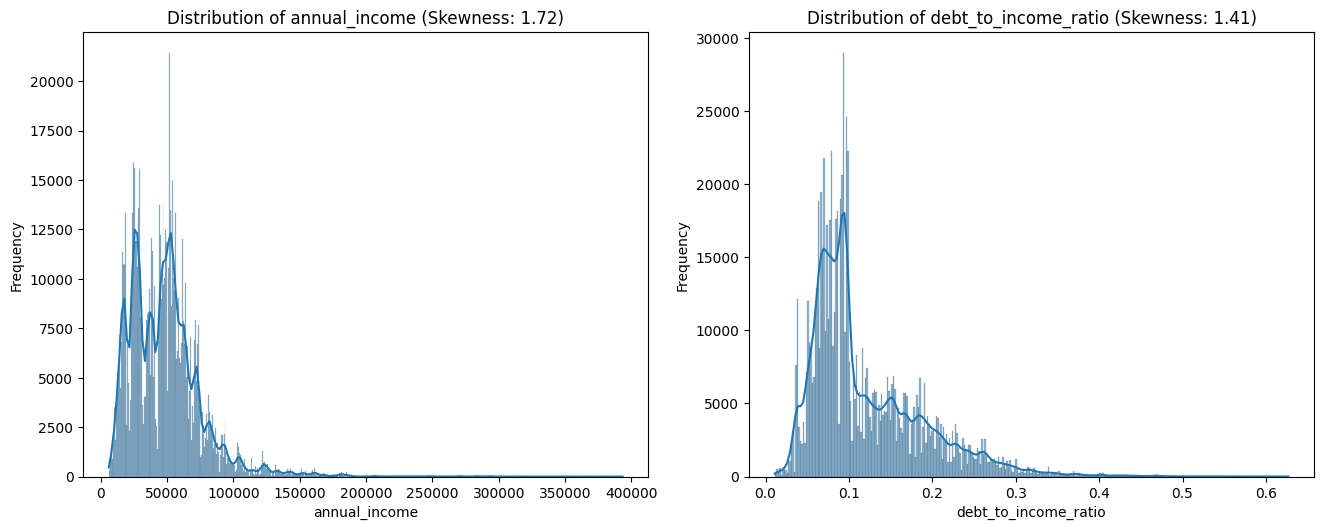

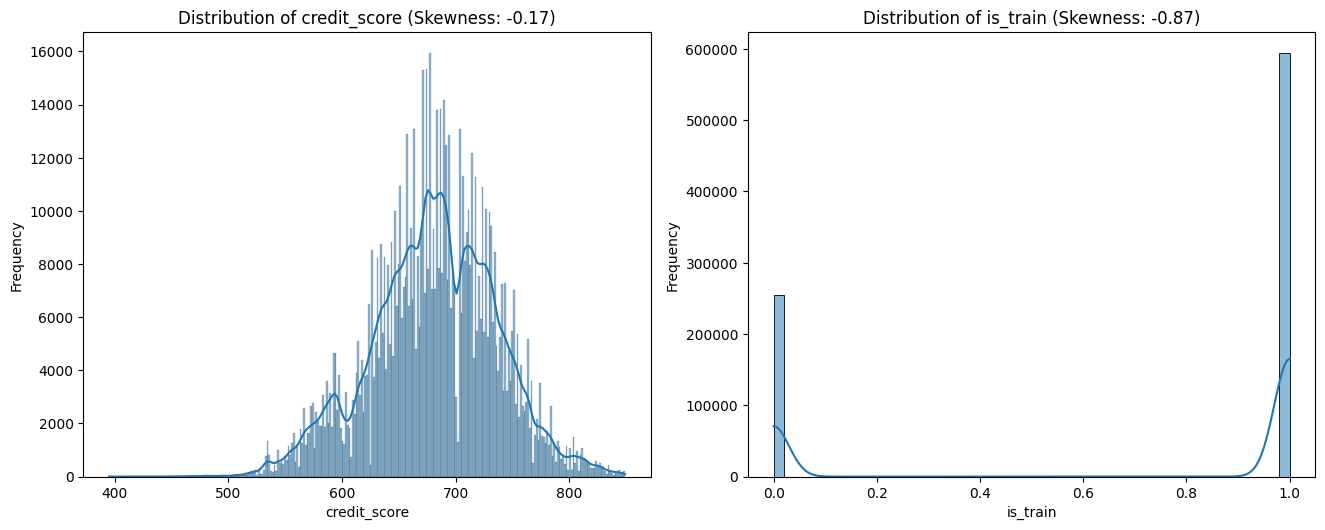

In [7]:
top_skewed_features = skewness.head(2).index
bottom_skewed_features = skewness.tail(2).index

def plot_skewness(columns):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
plot_skewness(columns=top_skewed_features)
plot_skewness(columns=bottom_skewed_features)

In [8]:
for col in ['annual_income', 'debt_to_income_ratio']:
    df[col] = np.log1p(df[col])
    print(f'Transformed skewness of {col}: {df[col].skew():.2f}')

Transformed skewness of annual_income: -0.34
Transformed skewness of debt_to_income_ratio: 1.22


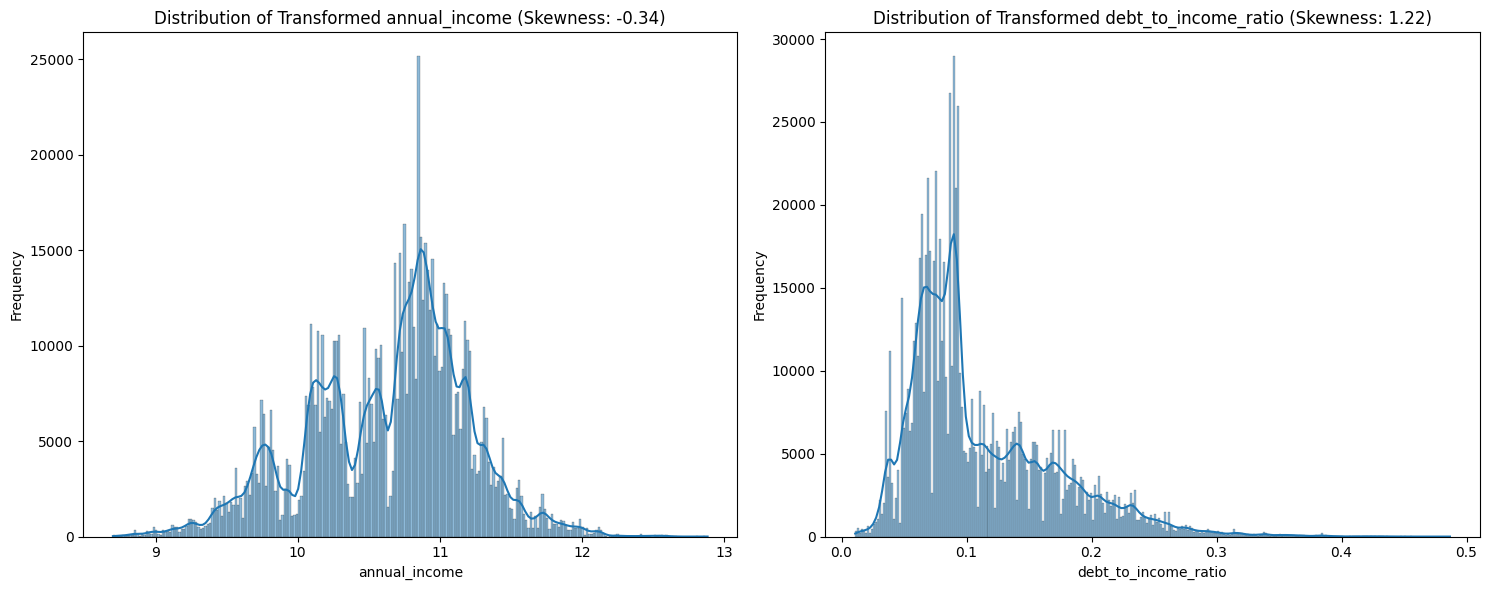

In [9]:
transformed_features = ['annual_income', 'debt_to_income_ratio']

plt.figure(figsize=(15, 6))
for i, col in enumerate(transformed_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of Transformed {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
# Reload df to revert previous transformations on 'debt_to_income_ratio'
train = pd.read_csv('train.csv', index_col='id')
train.drop(columns=['loan_paid_back'], inplace=True)
train['is_train'] = 1

test = pd.read_csv('test.csv', index_col='id')
test['is_train'] = 0

df = pd.concat([train, test])

# Apply log1p transformation to 'annual_income'
df['annual_income'] = np.log1p(df['annual_income'])
print(f"Transformed skewness of annual_income (log1p): {df['annual_income'].skew():.2f}")

# Apply square root transformation to 'debt_to_income_ratio'
df['debt_to_income_ratio'] = np.sqrt(df['debt_to_income_ratio'])
print(f"Transformed skewness of debt_to_income_ratio (sqrt): {df['debt_to_income_ratio'].skew():.2f}")

Transformed skewness of annual_income (log1p): -0.34
Transformed skewness of debt_to_income_ratio (sqrt): 0.76


In [11]:
from scipy.stats import boxcox

# Reload df to revert previous transformations on 'debt_to_income_ratio'
train = pd.read_csv('train.csv', index_col='id')
train.drop(columns=['loan_paid_back'], inplace=True)
train['is_train'] = 1

test = pd.read_csv('test.csv', index_col='id')
test['is_train'] = 0

df = pd.concat([train, test])

# Apply Box-Cox transformation to 'debt_to_income_ratio'
# Box-Cox requires data to be strictly positive. Check and ensure.
for col in ['debt_to_income_ratio', 'annual_income']:
    if (df[col] <= 0).any():
        print("Warning:", col, "contains non-positive values. Box-Cox might not be suitable or requires adjustment.")
        # A common approach for Box-Cox with non-positive values is to add a small constant
        # df['debt_to_income_ratio_transformed'], lambda_val = boxcox(df['debt_to_income_ratio'] + 1e-6)
    else:
        df[col], lambda_val = boxcox(df[col])
        print(f"Transformed skewness of debt_to_income_ratio (Box-Cox, lambda={lambda_val:.2f}): {df['debt_to_income_ratio'].skew():.2f}")


Transformed skewness of debt_to_income_ratio (Box-Cox, lambda=-0.05): 0.00
Transformed skewness of debt_to_income_ratio (Box-Cox, lambda=0.21): 0.00


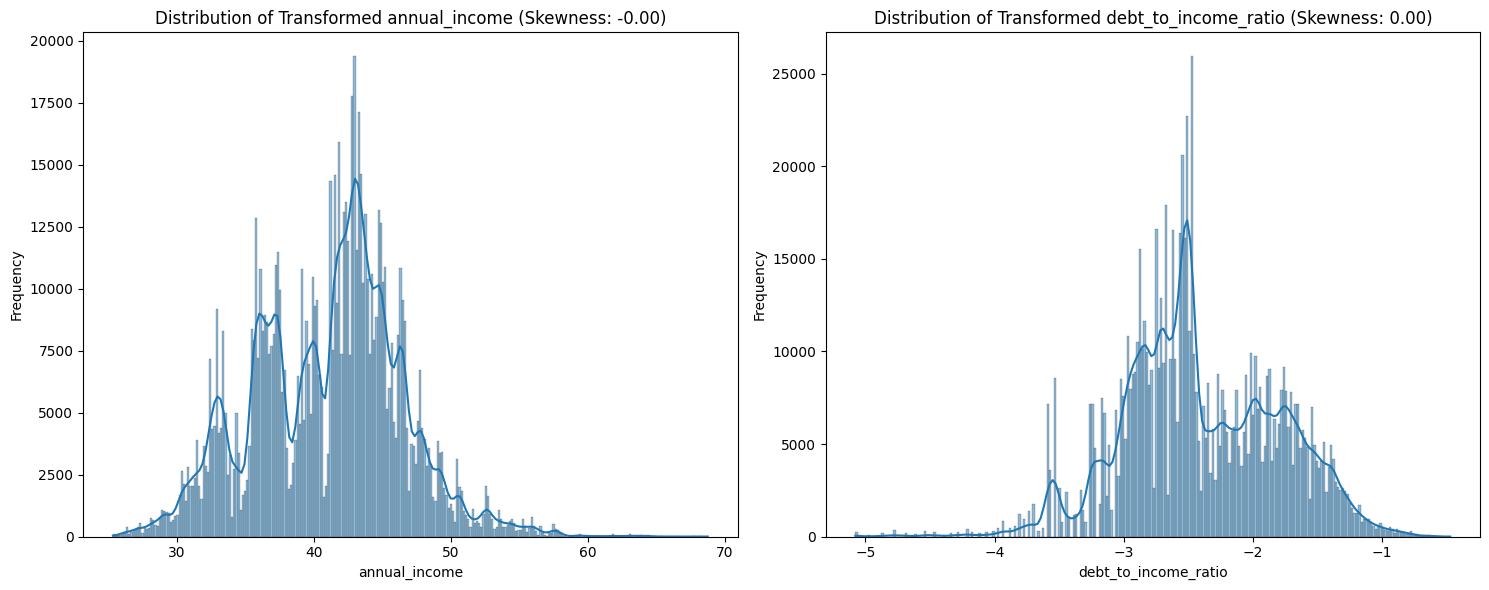

In [12]:
transformed_features = ['annual_income', 'debt_to_income_ratio']

plt.figure(figsize=(15, 6))
for i, col in enumerate(transformed_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of Transformed {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
categorical_col = df.select_dtypes(include='object').columns
for col in categorical_col:
    unique_values = df[col].unique()
    print(f'{col} ({len(unique_values)} unique)')
    print(df[col].unique())

gender (3 unique)
['Female' 'Male' 'Other']
marital_status (4 unique)
['Single' 'Married' 'Divorced' 'Widowed']
education_level (5 unique)
['High School' "Master's" "Bachelor's" 'PhD' 'Other']
employment_status (5 unique)
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
loan_purpose (8 unique)
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']
grade_subgrade (30 unique)
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [14]:
train = df[df['is_train'] == 1].copy()
train.drop(columns=['is_train'], inplace=True)

display(train.head())

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,,,,,,
0,37.487606,-2.642158,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3
1,35.004888,-1.881580,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3
2,42.477880,-2.479255,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5
3,41.915096,-2.935477,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1
4,36.232890,-3.171722,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1


In [15]:
print(train.shape)
print(train_df.shape)

(593994, 11)
(593994, 12)


In [16]:
train = train.merge(target, left_index=True, right_index=True)

In [17]:
train.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,37.487606,-2.642158,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,35.004888,-1.881580,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,42.477880,-2.479255,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,41.915096,-2.935477,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,36.232890,-3.171722,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [18]:
train['loan_paid_back'].value_counts(normalize=True)

,proportion
loan_paid_back,
1.0,0.79882
0.0,0.20118


In [29]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import pointbiserialr, chi2_contingency
from imblearn.pipeline import Pipeline as ImbPipeline

In [20]:
X = train.drop(columns=['loan_paid_back'])
y = train['loan_paid_back']

In [21]:
numerical_col = X.select_dtypes(include=np.number).columns

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_scores = {}
for col in categorical_col:
    cramers_scores[col] = cramers_v(train[col], train['loan_paid_back'])

X_num = train[numerical_col]
y = train['loan_paid_back']
mi_scores = mutual_info_classif(X_num, y, discrete_features=False)
mi_scores_dict = dict(zip(numerical_col, mi_scores))

all_scores = {**cramers_scores, **mi_scores_dict}
all_scores_series = pd.Series(all_scores).sort_values(ascending=False)

print("\n📊 Combined Feature Correlation Report with Target:")
print(all_scores_series)


📊 Combined Feature Correlation Report with Target:
employment_status       0.656820
grade_subgrade          0.227867
debt_to_income_ratio    0.079463
credit_score            0.034344
loan_purpose            0.025437
education_level         0.025274
loan_amount             0.013017
annual_income           0.011860
interest_rate           0.011725
gender                  0.007202
marital_status          0.001375
dtype: float64


In [22]:
train_X, val_X, trian_y, val_y = train_test_split(X, y, random_state=42)

In [24]:
onehot_col = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
ordinal_col = ['education_level', 'grade_subgrade']

In [27]:
# Define ordinal categories based on their intrinsic order
education_categories = ['Other', 'High School', "Bachelor's", "Master's", 'PhD']

# Generate grade_subgrade categories in the correct order (A1-F5)
grades = ['A', 'B', 'C', 'D', 'E', 'F']
subgrades = [str(i) for i in range(1, 6)]
grade_subgrade_categories = [g + s for g in grades for s in subgrades]

# Preprocessing steps
numerical_transformer = StandardScaler()
onehot_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=[education_categories, grade_subgrade_categories], handle_unknown='use_encoded_value', unknown_value=-1) # handle_unknown='use_encoded_value' and unknown_value=-1 for unseen categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_col),
        ('onehot', onehot_transformer, onehot_col),
        ('ordinal', ordinal_transformer, ordinal_col)
    ],
    remainder='passthrough' # Keep other columns (like 'is_train' if present, though it's dropped from X)
)

# Create an imblearn pipeline that includes preprocessing, SMOTE, and a classifier
# SMOTE will be applied only on training data within each CV fold
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42)) # Placeholder classifier
])

print("Preprocessing pipeline with SMOTE defined successfully.")
print(pipeline)

Preprocessing pipeline with SMOTE defined successfully.
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'marital_status',
                                                   'employment_status',
                                                   'loan_purpose']),
                                                 ('ordinal',
                                                  Ordin...
                                                                             ['A1',
                        

In [28]:
education_categories = ['Other', 'High School', "Bachelor's", "Master's", 'PhD']

def sort_grade_subgrade(grades):
    # Custom sort key for grade_subgrade
    def get_sort_key(item):
        grade = item[0]
        subgrade = int(item[1:])
        return (grade, subgrade)
    return sorted(grades, key=get_sort_key)

grade_subgrade_categories = sort_grade_subgrade(df['grade_subgrade'].unique())

print("Education Categories:", education_categories)
print("Grade Subgrade Categories (first 10):", grade_subgrade_categories[:10])
print("Grade Subgrade Categories (last 10):", grade_subgrade_categories[-10:])

Education Categories: ['Other', 'High School', "Bachelor's", "Master's", 'PhD']
Grade Subgrade Categories (first 10): ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5']
Grade Subgrade Categories (last 10): ['E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5']


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate base models with random_state=42 where applicable
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
lgbm_model = LGBMClassifier(random_state=42)

# Define parameter grids for each model, prefixed with 'classifier__'
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1],
        'classifier__penalty': ['l1', 'l2']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5]
    },
    'CatBoost': {
        'classifier__iterations': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__depth': [4, 6]
    },
    'LightGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__num_leaves': [20, 31]
    }
}

print("Defined models and their parameter grids:")
for model_name, params in param_grids.items():
    print(f"\n{model_name}:")
    for param_name, values in params.items():
        print(f"  {param_name}: {values}")
